In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

X_train=X_train/255
X_test=X_test/255
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

In [9]:
from keras.models import Sequential
from keras.applications import VGG19
from keras.layers import Dense, Flatten

vgg19 = VGG19(weights = 'imagenet', 
              include_top = False,input_shape=(32, 32, 3)
              )

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train_cat, epochs=3 ,batch_size=128, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.3407 - loss: 1.6344 - val_accuracy: 0.4289 - val_loss: 1.4380
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.5260 - loss: 1.2365 - val_accuracy: 0.6193 - val_loss: 1.0895
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.6461 - loss: 1.0137 - val_accuracy: 0.6933 - val_loss: 0.9009


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


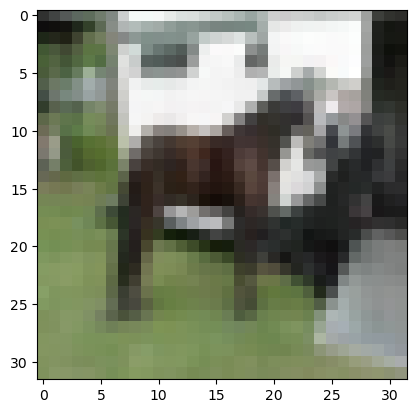

Precicted class : 7
Actual class : [7]


In [18]:
plt.imshow(X_test[20])
pred=np.argmax(model.predict(X_test[20].reshape(1,32,32,3)))
plt.show()
print(f"Precicted class : {pred}")
print(f"Actual class : {y_test[20]}")